In [ ]:
import trendln
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
#import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-) 

# download dataframe


In [207]:
len(data['High'].rolling(20).max())

1510

In [205]:
len(np.unique(data['High'].rolling(20).max()))

493

[*********************100%***********************]  1 of 1 completed


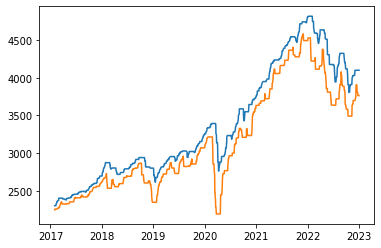

In [196]:
data = pdr.get_data_yahoo("^GSPC", start="2017-01-01",end="2023-01-01")
plt.plot(data['High'].rolling(20).max())
#plt.plot(data['Close'].rolling(20).mean())
plt.plot(data['Low'].rolling(20).min())

In [203]:
import pandas as pd
def roll_lin_trend(df, n):
    # Create an empty DataFrame to store the rolling linear trend
    roll_lin_trends = pd.DataFrame()

    # Calculate rolling linear trend
    for i in range(n, len(df)):
        # Slice the dataframe based on rolling window
        window = df.iloc[i-n:i]
        # Fit a linear regression model
        slope, intercept, r_value, p_value, std_err = stats.linregress(window.index.astype(str), window.Close.astype(float))
        # Append rolling linear trend
        roll_lin_trends = roll_lin_trends.append({'slope': slope, 'intercept': intercept}, ignore_index=True)

    # Plot the rolling linear trend with the Close price
    plt.plot(df.index, df.Close, label='Close Price')
    plt.plot(df.index[n:], roll_lin_trends.slope * df.index[n:].astype(str) + roll_lin_trends.intercept, label='Rolling Linear Trend')
    plt.title('Rolling Linear Trend of Close Price')
    plt.xlabel('Index')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()
    
roll_lin_trend(data,20)

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [186]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19,2.49,2.59,2.39,2.50,897427216,0,0.0
2004-08-20,2.52,2.72,2.50,2.70,458857488,0,0.0
2004-08-23,2.76,2.83,2.72,2.72,366857939,0,0.0
2004-08-24,2.77,2.78,2.58,2.61,306396159,0,0.0
2004-08-25,2.61,2.69,2.59,2.64,184645512,0,0.0
...,...,...,...,...,...,...,...
2023-02-07,103.63,108.67,103.55,108.04,33738800,0,0.0
2023-02-08,102.69,103.58,98.46,100.00,73546000,0,0.0
2023-02-09,100.54,100.61,93.86,95.46,97798600,0,0.0


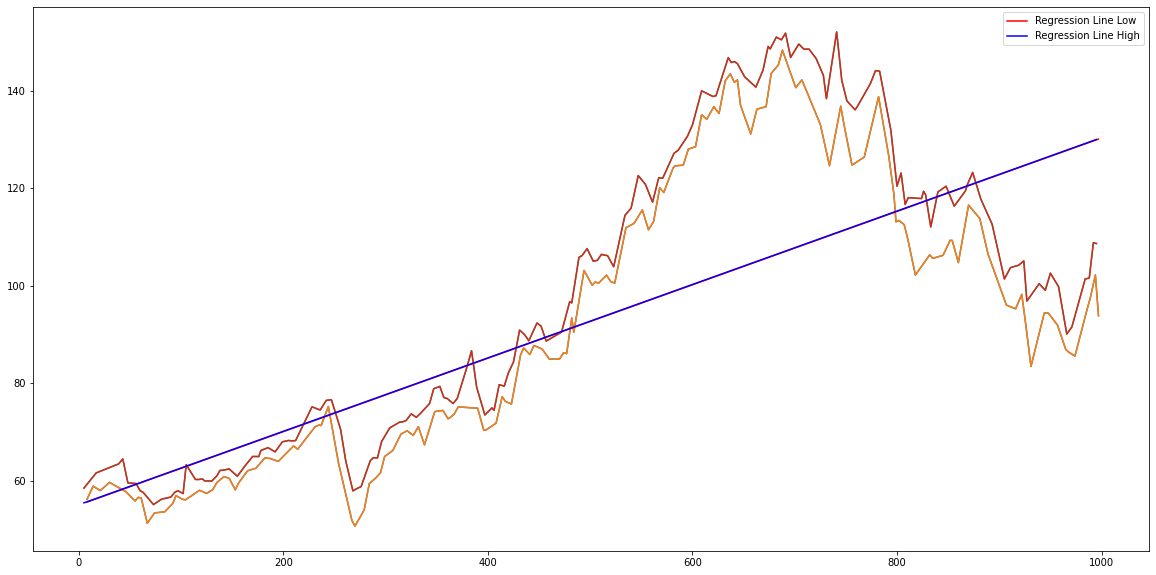

In [185]:
import scipy.stats as stats

plt.figure(figsize=(20,10))

plt.plot(minimaIdxs,hist[-1000:]['Low'][minimaIdxs])

x_low = minimaIdxs
y_low = hist[-1000:]['Low'][minimaIdxs]

slope_low, intercept_low, r_value_low, p_value_low, std_err_low = stats.linregress(x_low,y_low)
line_low = [slope*x_ for x_ in x_low]+intercept_low

plt.plot(x_low,y_low)
plt.plot(x_low,line_low, 'r-', label='Regression Line Low')

#plt.plot(index_values,hist[-1000:]['Close'])
plt.plot(maximaIdxs,hist[-1000:]['High'][maximaIdxs])
x_high = maximaIdxs
y_high = hist[-1000:]['High'][maximaIdxs]

slope_high, intercept_high, r_value_high, p_value_high, std_err_high = stats.linregress(x_high,y_high)
line_high = [slope*x_ for x_ in x_high]+intercept_high

plt.plot(x_high,y_high)
plt.plot(x_high,line_high, 'b-', label='Regression Line High')
plt.legend()
plt.show()

In [ ]:
METHOD_NAIVE, METHOD_NAIVECONSEC, METHOD_NUMDIFF = 0, 1, 2
METHOD_NCUBED, METHOD_NSQUREDLOGN, METHOD_HOUGHPOINTS, METHOD_HOUGHLINES, METHOD_PROBHOUGH = 0, 1, 2, 3, 4
def calc_averaged_support_resistance(mins, maxs):
    minimaIdxs, pmin, mintrend, minwindows = mins
    maximaIdxs, pmax, maxtrend, maxwindows = maxs
    support_line = np.array([])
    resistance_line = np.array([])
    for window in minwindows:
        slope_sum = 0
        intercept_sum = 0
        for trend in window:
            slope_sum += trend[1][0]
            intercept_sum += trend[1][1]
        support_line = np.append(support_line, [slope_sum/len(window), intercept_sum/len(window)])
    for window in maxwindows:
        slope_sum = 0
        intercept_sum = 0
        for trend in window:
            slope_sum += trend[1][0]
            intercept_sum += trend[1][1]
        resistance_line = np.append(resistance_line, [slope_sum/len(window), intercept_sum/len(window)])
    return (support_line, resistance_line)
tick = yf.Ticker('^GSPC') # S&P500
hist = tick.history(period="max", rounding=True)
mins, maxs = trendln.calc_support_resistance(hist[-1000:].Close)
minimaIdxs, pmin, mintrend, minwindows = trendln.calc_support_resistance((hist[-1000:].Low, None)) #support only
mins, maxs = trendln.calc_support_resistance((hist[-1000:].Low, hist[-1000:].High))
(minimaIdxs, pmin, mintrend, minwindows), (maximaIdxs, pmax, maxtrend, maxwindows) = mins, maxs
minimaIdxs, maximaIdxs = trendln.get_extrema(hist[-1000:].Close)
maximaIdxs = trendln.get_extrema((None, hist[-1000:].High)) #maxima only
minimaIdxs, maximaIdxs = trendln.get_extrema((hist[-1000:].Low, hist[-1000:].High))
support_line, resistance_line = calc_averaged_support_resistance((minimaIdxs, pmin, mintrend, minwindows), (maximaIdxs, pmax, maxtrend, maxwindows))
"""

def get_support_resistance(hist, xformatter = None, numbest = 2, fromwindows = True,
                            pctbound=0.1, extmethod = METHOD_NUMDIFF, method=METHOD_NSQUREDLOGN,
                            window=125, errpct = 0.005, hough_scale=0.01, hough_prob_iter=10, sortError=False, accuracy=1):
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    ret = trendln.calc_support_resistance(hist, extmethod, method, window, errpct, hough_scale, hough_prob_iter, sortError, accuracy)
    if len(ret) == 2:
        minimaIdxs, pmin, mintrend, minwindows = ret[0]
        maximaIdxs, pmax, maxtrend, maxwindows = ret[1]
        if type(hist) is tuple and len(hist) == 2 and check_num_alike(hist[0]) and check_num_alike(hist[1]):
            len_h = len(hist[0])
            min_h, max_h = min(min(hist[0]), min(hist[1])), max(max(hist[0]), max(hist[1]))
            disp = [(hist[0], minimaIdxs, pmin, 'yo', 'Avg. Support', 'y--'), (hist[1], maximaIdxs, pmax, 'bo', 'Avg. Resistance', 'b--')]
            dispwin = [(hist[0], minwindows, 'Support', 'g--'), (hist[1], maxwindows, 'Resistance', 'r--')]
            disptrend = [(hist[0], mintrend, 'Support', 'g--'), (hist[1], maxtrend, 'Resistance', 'r--')]
        else:
            len_h = len(hist)
            min_h, max_h = min(hist), max(hist)
            disp = [(hist, minimaIdxs, pmin, 'yo', 'Avg. Support', 'y--'), (hist, maximaIdxs, pmax, 'bo', 'Avg. Resistance', 'b--')]
            dispwin = [(hist, minwindows, 'Support', 'g--'), (hist, maxwindows, 'Resistance', 'r--')]
            disptrend = [(hist, mintrend, 'Support', 'g--'), (hist, maxtrend, 'Resistance', 'r--')]
    else:
        minimaIdxs, pmin, mintrend, minwindows = ([], [], [], []) if hist[0] is None else ret
        maximaIdxs, pmax, maxtrend, maxwindows = ([], [], [], []) if hist[1] is None else ret
        len_h = len(hist[1 if hist[0] is None else 0])
        min_h, max_h = min(hist[1 if hist[0] is None else 0]), max(hist[1 if hist[0] is None else 0])
        disp = [(hist[1], maximaIdxs, pmax, 'bo', 'Avg. Resistance', 'b--') if hist[0] is None else (hist[0], minimaIdxs, pmin, 'yo', 'Avg. Support', 'y--')]
        dispwin = [(hist[1], maxwindows, 'Resistance', 'r--') if hist[0] is None else (hist[0], minwindows, 'Support', 'g--')]
        disptrend = [(hist[1], maxtrend, 'Resistance', 'r--') if hist[0] is None else (hist[0], mintrend, 'Support', 'g--')]
    def add_trend(h, trend, lbl, clr, bFirst):
        results = []
        for ln in trend[:numbest]:
            maxx = ln[0][-1]+1
            while maxx < len_h:
                ypred = ln[1][0] * maxx + ln[1][1]
                if (h[maxx] > ypred and h[maxx-1] < ypred or h[maxx] < ypred and h[maxx-1] > ypred or
                    ypred > max_h + (max_h-min_h)*pctbound or ypred < min_h - (max_h-min_h)*pctbound): break
                maxx += 1
            x_vals = np.array((ln[0][0], maxx)) # plt.gca().get_xlim())
            y_vals = ln[1][0] * x_vals + ln[1][1]
            results.append((x_vals, y_vals))
        return results
    if fromwindows:
        support_results, resistance_results = [], []
        for h, windows, lbl, clr in dispwin:
            for trend in windows:
                res = add_trend(h, trend, lbl, clr, True)
                if lbl == 'Support':
                    support_results += res
                else:
                    resistance_results += res
    else:
        support_results, resistance_results = [], []
        for h, trend, lbl, clr in disptrend:
            if lbl == 'Support':
                support_results += add_trend(h, trend, lbl, clr, True)
            else:
                resistance_results += add_trend(h, trend, lbl, clr, True)

    return (support_results, resistance_results)
"""

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf

def support_resistance_lines(stock):
    data = yf.Ticker(stock).history(period="max")
    highs = data['High'].values
    lows = data['Low'].values
    
    # Calculate the support and resistance lines
    support = lows.min()
    resistance = highs.max()
    
    # Plot the lines
    plt.plot([0, len(highs)], [support, support], label="Support")
    plt.plot([0, len(lows)], [resistance, resistance], label="Resistance")
    plt.legend()
    plt.show()

In [ ]:
support_resistance_lines('GOOG')

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Function to plot Fibonacci Retracements 
def plotFibonacciRetracements(data):
    
    # Set the window size
    window_size = 20
    
    # Iterate over the data with a rolling window
    for i in range(0, len(data), window_size):
        # Get the current window
        window = data[i:i+window_size]
        
        # Get the high and low of the window
        high = window['High'].max() 
        low = window['Low'].min()
        
        # Calculate the Fibonacci retracements
        fibonacci_levels = [] 
        fibonacci_levels.append(low)
        fibonacci_levels.append(low + (high-low)*0.236)
        fibonacci_levels.append(low + (high-low)*0.382)
        #fibonacci_levels.append(low + (high-low)*0.5)
        fibonacci_levels.append(low + (high-low)*0.618)
        fibonacci_levels.append(low + (high-low)*0.786)
        fibonacci_levels.append(high)
        
        # Get the index positions of the min and max of the window
        min_idx = window[window['Low'] == low].index[0]
        max_idx = window[window['High'] == high].index[0]
        
        # Plot the Fibonacci retracements
        plt.plot(window.index, window['Close'], color='blue')
        #plt.plot(data.index, fibonacci_levels, color='red')
        for hl in fibonacci_levels:
            plt.hlines(hl,xmin = min_idx, xmax = max_idx)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('Fibonacci Retracements')
    plt.legend(['Close Price', 'Fibonacci Levels'])
    plt.show()
    
# Get the data
data = yf.download('AAPL', start="2020-01-01", end="2020-07-01", interval="1d")

# Plot the Fibonacci Retracements
plotFibonacciRetracements(data)
    
# Get the data
data = yf.download('AAPL', start="2020-01-01", end="2020-07-01", interval="1d")

# Plot the Fibonacci Retracements
plotFibonacciRetracements(data)
    
# Get the data
data = yf.download('AAPL', start="2020-01-01", end="2020-07-01", interval="1d")

# Plot the Fibonacci Retracements
plotFibonacciRetracements(data)

In [ ]:
plot_fibonacci_support_resistance('^GSPC','2020-01-01','2023-01-01')

In [ ]:
import matplotlib.pyplot as plt
import trendln

tick = yf.Ticker('GOOG') # S&P500
#tick = yf.Ticker('^GSPC') # S&P500
hist = tick.history(period="max", rounding=True)
h = hist[-1000:].Close

# calculate support and resistance
mins, maxs = trendln.calc_support_resistance(hist[-1000:].Close)
#minimaIdxs, pmin, mintrend, minwindows = trendln.calc_support_resistance((hist[-1000:].Low, None)) #support only
#mins, maxs = trendln.calc_support_resistance(h)
mins, maxs = trendln.calc_support_resistance((hist[-1000:].Low, hist[-1000:].High))
(minimaIdxs, pmin, mintrend, minwindows), (maximaIdxs, pmax, maxtrend, maxwindows) = mins, maxs
#minimaIdxs, maximaIdxs = trendln.get_extrema(hist[-1000:].Close)
#maximaIdxs = trendln.get_extrema((None, hist[-1000:].High)) #maxima only
#minimaIdxs, maximaIdxs = trendln.get_extrema((hist[-1000:].Low, hist[-1000:].High))

index_values = list(range(len(hist[-1000:].index)))
index_map = dict(zip(hist[-1000:].index, index_values))

# plot average support line
support_x = [index_map[hist[-1000:].index[i]] for i in minimaIdxs]
support_y = [h[i] for i in minimaIdxs]
m, b = pmin
support_trend = [m*x + b for x in support_x]
plt.plot(support_x, support_trend, label="Support")

# plot average resistance line
resistance_x = [index_map[hist[-1000:].index[i]] for i in maximaIdxs]
resistance_y = [h[i] for i in maximaIdxs]
m, b = pmax
resistance_trend = [m*x + b for x in resistance_x]
plt.plot(resistance_x, resistance_trend, label="Resistance")

# add legend
plt.legend()

x_values = [index_map[i] for i in hist[-1000:].index]
y_values = h
plt.plot(x_values, y_values, label="Closing Price")
# show plot
plt.show()

In [ ]:
pmax

In [ ]:
trendln.plot_support_resistance(data['Adj Close'])

In [ ]:
trendln.plot_support_resistance(data['High'])

In [ ]:
trendln.plot_support_resistance(data['Low'])

In [ ]:
h = data['Close']
mins, maxs = trendln.calc_support_resistance(h)
(minimaIdxs, pmin, mintrend, minwindows), (maximaIdxs, pmax, maxtrend, maxwindows) = mins, maxs

# Plot support and resistance lines

idx = data.index
#fig = trendln.plot_sup_res_date((data['low'], data['high']), idx)
trendln.plot_sup_res_date((data['Low'], data['High']), idx)

In [ ]:
#trendln.calc_support_resistance(data['Adj Close'])
values = trendln.calc_support_resistance((data['Low'], data['High']))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_support_resistance_(hist, support_results, resistance_results, xformatter = None):

    plt.plot(hist, 'o', color='gray')
    supportdata = np.array(support_results)
    resistancedata = np.array(resistance_results)
    if supportdata.size > 0:
        plt.plot(supportdata[:,0], supportdata[:,1], color='g', linestyle='--', label='Support')
    if resistancedata.size > 0:
        plt.plot(resistancedata[:,0], resistancedata[:,1], color='r', linestyle='--', label='Resistance')
    if xformatter is not None:
        xtick_locs = [x[0] for x in support_results] + [x[0] for x in resistance_results] + [len(hist)-1]
        plt.gca().xaxis.set_major_locator(ticker.FixedLocator(xtick_locs))
        plt.gca().xaxis.set_major_formatter(xformatter)
    plt.legend()
    plt.show()

In [ ]:
#hist = [1,2,3,4,5,6,7,8,9,10]

# Call get_support_resistance
support_results, resistance_results = get_support_resistance(data.Close)

# Use the results to call plot_support_resistance
def xformatter(x,pos):
    return str(int(x))

plot_support_resistance_(data.Close, support_results, resistance_results, xformatter)